In [1]:
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from do_mpc.data import load_results
import numpy as np
import pandas as pd

S = 50
K = 5

In [2]:
def extract_data(path):
    df = load_results(path)
    sim_data = df['simulator']
    mpc_data = df['mpc']
    mhe_data = df['estimator']

    # Extract data from do-mpc data structures
    _t = mhe_data['_time']
    x_est = mhe_data['_x', 'x']
    x_true = sim_data['_x', 'x']
    u = mhe_data['_u', 'h']
    u_optimal = mpc_data['_u', 'h']
    y_true = sim_data['_aux', 'performance']
    y_est = mhe_data['_aux', 'performance']

    return _t, x_est, x_true, u, u_optimal, y_true, y_est

In [3]:
class Entry():
    def __init__(self, datum):
        self.datum = datum

def array_to_class(data):
    entries = np.array([])
    for datum in data:
        entry = Entry(datum)
        entries = np.append(entries, entry)
    return entries

In [4]:
result_path = './mpc_mhe_model/'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
for i in range(0,S):
    result_filename = f'student_%i.pkl'%i
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(os.path.join(result_path, result_filename))
    #df_tmp = pd.DataFrame(data=np.array([x_est, x_true, u, u_optimal, y_true, y_est]), columns=columns, index=_t.flatten())
    df_tmp = pd.DataFrame({'x_est':array_to_class(x_est),
                            'x_true':array_to_class(x_true),
                            'u':array_to_class(u),
                            #'u_optimal':array_to_class(u_optimal),
                            'y_true':array_to_class(y_true),
                            'y_est':array_to_class(y_est)})
    frames.append(df_tmp)

skill_0_df_model = pd.DataFrame()
skill_end_df_model = pd.DataFrame()
for k in range(K):
    skill_0_vect = np.array([])
    skill_end_vect = np.array([])
    for frame in frames:
        skill_0_vect = np.append(skill_0_vect, frame['x_true'].iloc[0].datum[k])
        skill_end_vect = np.append(skill_end_vect, frame['x_true'].iloc[-3].datum[k])
    skill_0_df_model[f'skill_%i'%k] = skill_0_vect
    skill_end_df_model[f'skill_%i'%k] = skill_end_vect 

skill_0_model = np.zeros((60,S))
for i, frame in enumerate(frames): # every student
    for j, x in enumerate(frame['x_true']):
        skill_0_model[j,i] = x.datum.mean()

In [5]:
result_path = './benchmark_schedule/'
frames = []
columns = ['x_est', 'x_true', 'u', 'y_true', 'y_est']
# Load data from each student
for i in range(0,S):
    result_filename = f'student_%i.pkl'%i
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(os.path.join(result_path, result_filename))
    #df_tmp = pd.DataFrame(data=np.array([x_est, x_true, u, u_optimal, y_true, y_est]), columns=columns, index=_t.flatten())
    df_tmp = pd.DataFrame({'x_est':array_to_class(x_est),
                            'x_true':array_to_class(x_true),
                            'u':array_to_class(u),
                            'y_true':array_to_class(y_true),
                            'y_est':array_to_class(y_est)})
    frames.append(df_tmp)

skill_0_df_random = pd.DataFrame()
skill_end_df_random = pd.DataFrame()
for k in range(K):
    skill_0_vect = np.array([])
    skill_end_vect = np.array([])
    for frame in frames:
        skill_0_vect = np.append(skill_0_vect, frame['x_true'].iloc[0].datum[k])
        skill_end_vect = np.append(skill_end_vect, frame['x_true'].iloc[-5].datum[k])
    skill_0_df_random[f'skill_%i'%k] = skill_0_vect
    skill_end_df_random[f'skill_%i'%k] = skill_end_vect 

skill_0_random = np.zeros((60,S))
for i, frame in enumerate(frames): # every student
    for j, x in enumerate(frame['x_true']):
        skill_0_random[j,i] = x.datum.mean()

In [6]:
result_path = './benchmark_increasing_difficulty/'
frames = []
columns = ['x_est', 'x_true', 'u', 'u_optimal', 'y_true', 'y_est']
for i in range(0,S):
    result_filename = f'student_%i.pkl'%i
    _t, x_est, x_true, u, u_optimal, y_true, y_est = extract_data(os.path.join(result_path, result_filename))
    #df_tmp = pd.DataFrame(data=np.array([x_est, x_true, u, u_optimal, y_true, y_est]), columns=columns, index=_t.flatten())
    df_tmp = pd.DataFrame({'x_est':array_to_class(x_est),
                            'x_true':array_to_class(x_true),
                            'u':array_to_class(u),
                            'u_optimal':array_to_class(u_optimal),
                            'y_true':array_to_class(y_true),
                            'y_est':array_to_class(y_est)})
    frames.append(df_tmp)

skill_0_df_increasing_diff = pd.DataFrame()
skill_end_df_increasing_diff = pd.DataFrame()
for k in range(K):
    skill_0_vect = np.array([])
    skill_end_vect = np.array([])
    for frame in frames:
        skill_0_vect = np.append(skill_0_vect, frame['x_true'].iloc[0].datum[k])
        skill_end_vect = np.append(skill_end_vect, frame['x_true'].iloc[-1].datum[k])
    skill_0_df_increasing_diff[f'skill_%i'%k] = skill_0_vect
    skill_end_df_increasing_diff[f'skill_%i'%k] = skill_end_vect 

skill_0_increasing_diff = np.zeros((20,S))
for i, frame in enumerate(frames): # every student
    for j, x in enumerate(frame['x_true']):
        skill_0_increasing_diff[j,i] = x.datum.mean()

FileNotFoundError: [Errno 2] No such file or directory: './benchmark_increasing_difficulty/student_0.pkl'

In [6]:
columns = [f'student_%i'%i for i in range(S)]
skill_0_model_df = pd.DataFrame(skill_0_model, columns=columns)

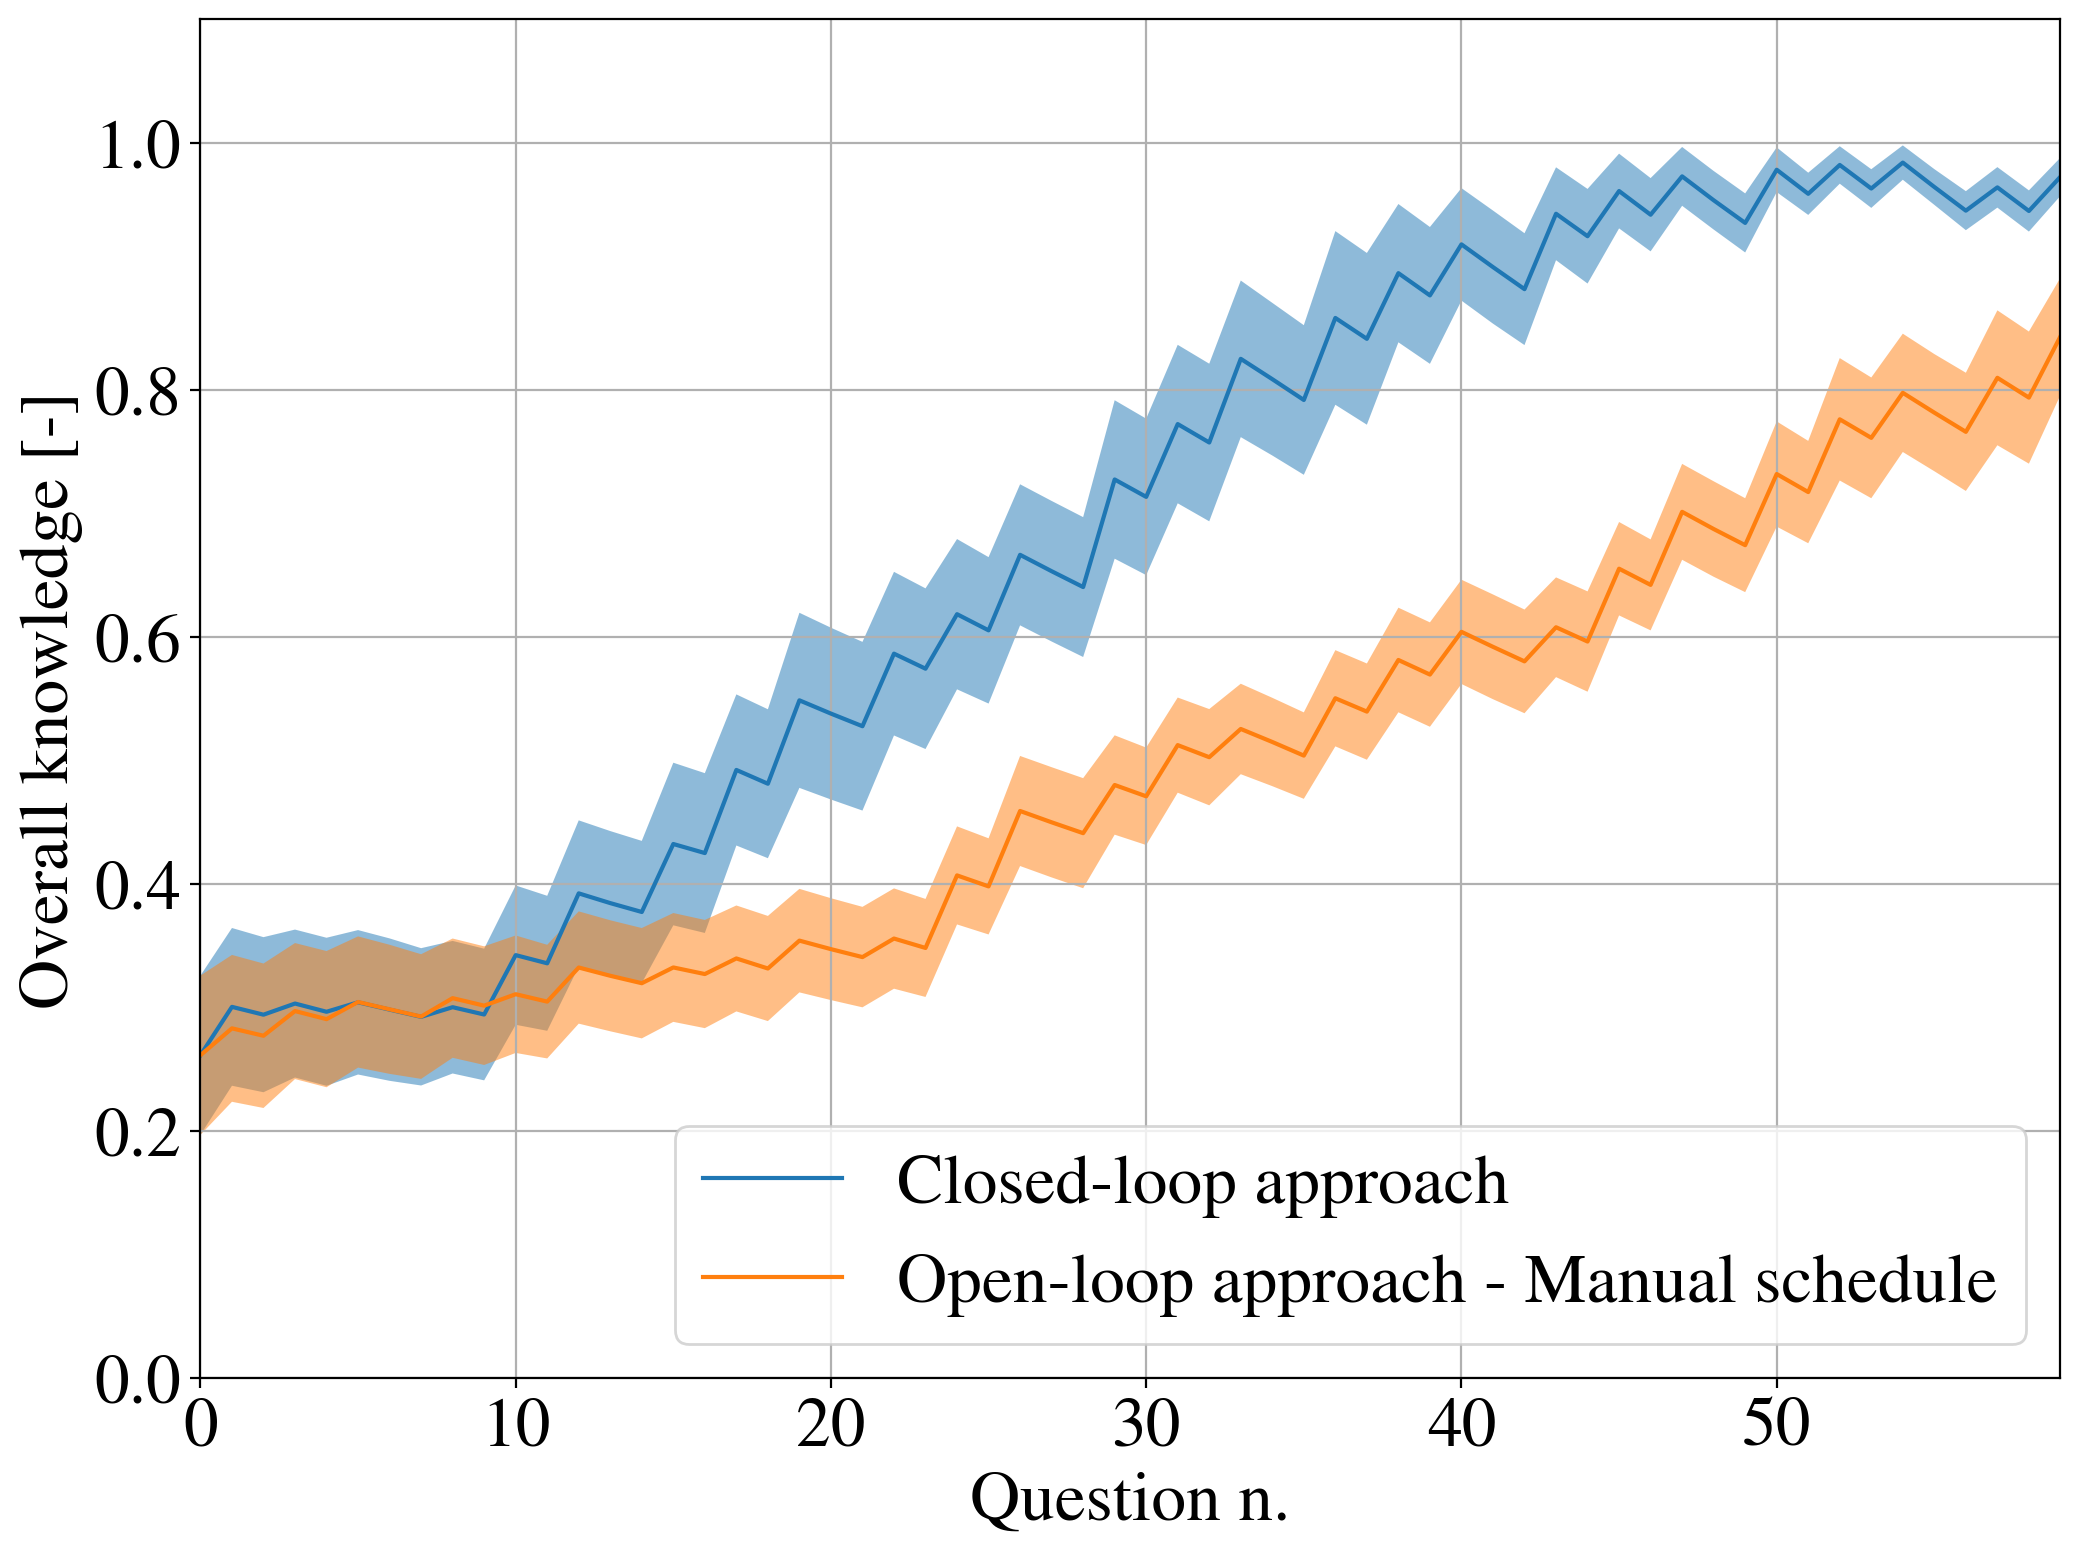

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 25
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
fig = plt.figure(figsize=(12,9), dpi=200)
plt.plot(np.arange(len(skill_0_model.mean(axis=1))), skill_0_model.mean(axis=1), label='Closed-loop approach')
#plt.fill_between(np.arange(len(skill_0_model.mean(axis=1))), skill_0_model.mean(axis=1)-skill_0_model.std(axis=1), skill_0_model.mean(axis=1)+skill_0_model.std(axis=1), alpha=0.5)
plt.fill_between(np.arange(len(skill_0_model.mean(axis=1))), skill_0_model.mean(axis=1)-skill_0_model.std(axis=1), skill_0_model.mean(axis=1)+skill_0_model.std(axis=1), alpha=0.5)
plt.plot(np.arange(len(skill_0_random.mean(axis=1))), skill_0_random.mean(axis=1), label='Open-loop approach - Manual schedule')
plt.fill_between(np.arange(len(skill_0_random.mean(axis=1))), skill_0_random.mean(axis=1)-skill_0_random.std(axis=1), skill_0_random.mean(axis=1)+skill_0_random.std(axis=1), alpha=0.5)
#plt.plot(np.arange(len(skill_0_increasing_diff.mean(axis=1))), skill_0_increasing_diff.mean(axis=1), label='Open-loop approach - GID')
#plt.fill_between(np.arange(len(skill_0_increasing_diff.mean(axis=1))), skill_0_increasing_diff.mean(axis=1)-skill_0_increasing_diff.std(axis=1), skill_0_increasing_diff.mean(axis=1)+skill_0_increasing_diff.std(axis=1), alpha=0.5)
plt.legend(loc='lower right')
#plt.title('Average knowledge of the class - Comparison')
plt.xlabel('Question n.')
plt.ylabel('Overall knowledge [-]')
plt.ylim([0, 1.1])
plt.margins(x=0)
plt.grid(True)
# plt.plot(skill_0_random.mean(axis=1))
# plt.plot(skill_0_increasing_diff.mean(axis=1))
plt.savefig("Model Comparison - Overall Knowledge.png")